In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import statsmodels.api as sm
import plotly.express as px

In [9]:
#Read the master data
df = pd.read_csv("Data_Glacier_VIrtual_Internship/Week_09/master_data.csv")

In [10]:
# First 5 in our dataset
df.head()

,Name,Email_x,Age,Country,Email_y,Education Level,Number of Languages Spoken,Email_x.1,Gender,Satisfaction Rate,Email_y.1,Marital Status,Number of Children
0,Landon Patel,landonpatel@gmail.com,32,United States,landonpatel@gmail.com,Bachelor's Degree,2,landonpatel@gmail.com,Male,8,landonpatel@gmail.com,Single,3
1,Cassidy Turner,cassidyturner@yahoo.com,24,Canada,cassidyturner@yahoo.com,Master's Degree,1,cassidyturner@yahoo.com,Non-binary,9,cassidyturner@yahoo.com,Married,4
2,Axl Thompson,axl.thompson@hotmail.com,43,United States,axl.thompson@hotmail.com,High School,3,axl.thompson@hotmail.com,Male,7,axl.thompson@hotmail.com,Single,1
3,Ivy Wilson,ivywilson@gmail.com,58,United Kingdom,ivywilson@gmail.com,Bachelor's Degree,4,ivywilson@gmail.com,Female,6,ivywilson@gmail.com,Divorced,0
4,Reece Scott,reece.scott@outlook.com,26,Australia,reece.scott@outlook.com,Doctorate,4,reece.scott@outlook.com,Male,4,reece.scott@outlook.com,Married,2


In [11]:
#Last 5 rows in our dataset
df.tail()

,Name,Email_x,Age,Country,Email_y,Education Level,Number of Languages Spoken,Email_x.1,Gender,Satisfaction Rate,Email_y.1,Marital Status,Number of Children
82,Ryann Davis,ryann.davis@gmail.com,24,Canada,ryann.davis@gmail.com,Bachelor's Degree,1,ryann.davis@gmail.com,Female,10,ryann.davis@gmail.com,Single,0
83,Lara Johnson,lara.johnson@yahoo.com,54,United States,lara.johnson@yahoo.com,Master's Degree,3,lara.johnson@yahoo.com,Female,3,lara.johnson@yahoo.com,Married,2
84,Paislee King,paislee_king@hotmail.com,61,United Kingdom,paislee_king@hotmail.com,High School,1,paislee_king@hotmail.com,Female,4,paislee_king@hotmail.com,Single,1
85,Kole Scott,kole_scott@gmail.com,63,Australia,kole_scott@gmail.com,Bachelor's Degree,4,kole_scott@gmail.com,Male,8,kole_scott@gmail.com,Married,3
86,Alaia Taylor,alaia_taylor@yahoo.com,23,United States,alaia_taylor@yahoo.com,Doctorate,2,alaia_taylor@yahoo.com,Female,2,alaia_taylor@yahoo.com,Married,4


In [12]:
#Master Data General information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Name                        87 non-null     object
 1   Email_x                     87 non-null     object
 2   Age                         87 non-null     int64 
 3   Country                     87 non-null     object
 4   Email_y                     87 non-null     object
 5   Education Level             87 non-null     object
 6   Number of Languages Spoken  87 non-null     int64 
 7   Email_x.1                   87 non-null     object
 8   Gender                      87 non-null     object
 9   Satisfaction Rate           87 non-null     int64 
 10  Email_y.1                   87 non-null     object
 11  Marital Status              87 non-null     object
 12  Number of Children          87 non-null     int64 
dtypes: int64(4), object(9)
memory usage: 9.0+ KB


In [14]:
#Correlation between numerical columns
df.corr(numeric_only=True)

,Age,Number of Languages Spoken,Satisfaction Rate,Number of Children
Age,1.000000,0.125291,0.071077,-0.081498
Number of Languages Spoken,0.125291,1.000000,-0.090605,-0.074881
Satisfaction Rate,0.071077,-0.090605,1.000000,-0.035048
Number of Children,-0.081498,-0.074881,-0.035048,1.000000


In [15]:
#Size of Data
df.size

1131

In [16]:
#Import columns for duplication test
duplicates = df.duplicated()

In [17]:
# Check for Duplicates
duplicate_rows = df[duplicates]
print(duplicate_rows)

Empty DataFrame
Columns: [Name, Email_x, Age, Country, Email_y, Education Level, Number of Languages Spoken, Email_x.1, Gender, Satisfaction Rate, Email_y.1, Marital Status, Number of Children]
Index: []


[Text(0, 0, 'Age'),
 Text(1, 0, 'Number of Languages Spoken'),
 Text(2, 0, 'Satisfaction Rate'),
 Text(3, 0, 'Number of Children')]

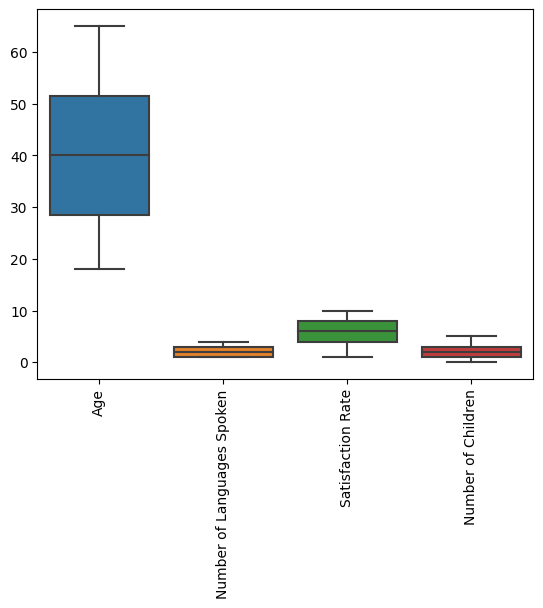

In [18]:
#Check for outliers
ax = sns.boxplot(data=df)

# Rotate the x-axis labels
ax.xaxis.set_ticklabels(ax.xaxis.get_ticklabels(), rotation=90)

In [19]:
# Check for missing values
missing_values = df.isnull().sum()

In [20]:
# Display the count of missing values for each column
print(missing_values)

Name                          0
Email_x                       0
Age                           0
Country                       0
Email_y                       0
Education Level               0
Number of Languages Spoken    0
Email_x.1                     0
Gender                        0
Satisfaction Rate             0
Email_y.1                     0
Marital Status                0
Number of Children            0
dtype: int64


In [21]:
# Select numeric columns
numeric_columns = df.select_dtypes(include='number')

In [22]:
# Calculate the skewness for each numeric column
skewness = numeric_columns.skew()

In [23]:
# Display the skewness values
print(skewness)

Age                           0.071673
Number of Languages Spoken    0.224759
Satisfaction Rate            -0.178100
Number of Children            0.330569
dtype: float64


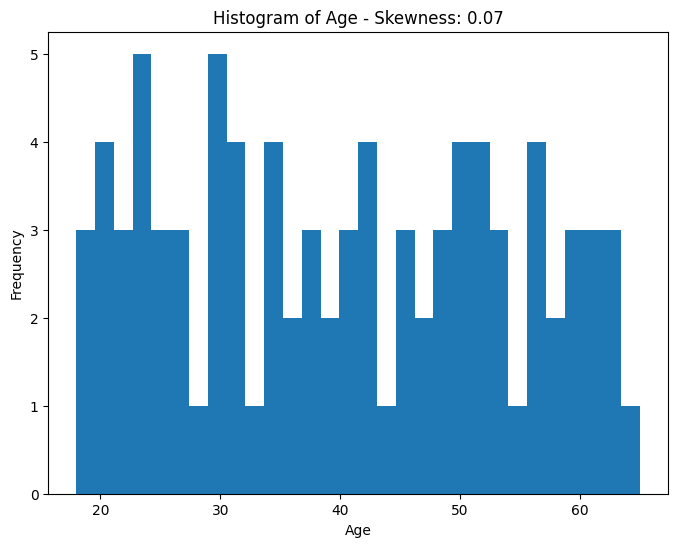

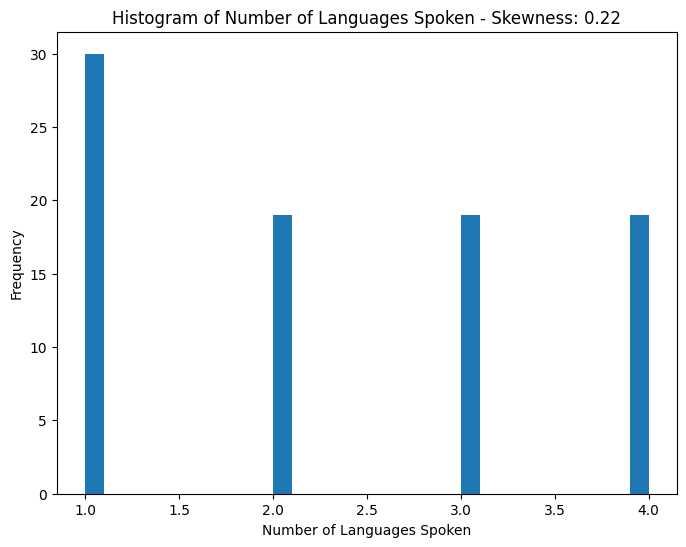

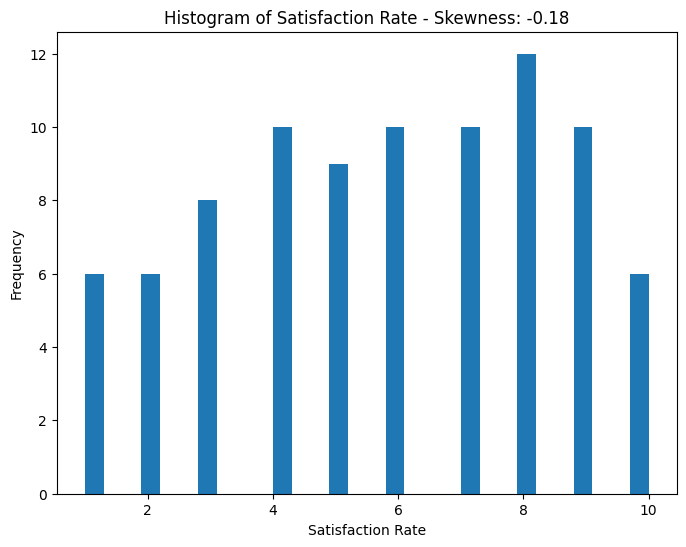

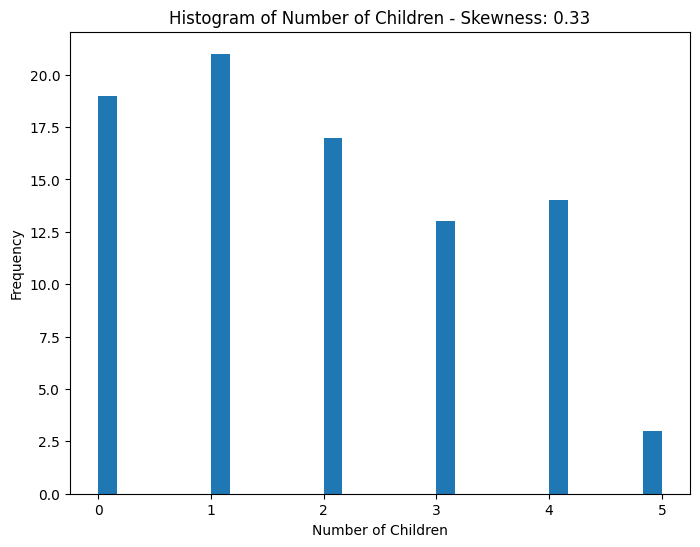

In [24]:
#### Iterate over each numeric column and plot histogram
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=30)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column} - Skewness: {round(df[column].skew(), 2)}')

In [25]:

from scipy.stats.mstats import winsorize
# Apply winsorizing to the Age column
winsorized_df = df.copy()

# Get a list of numeric columns
numeric_cols = winsorized_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Apply winsorizing to all numeric columns
for col in numeric_cols:
    winsorized_df[col] = winsorize(winsorized_df[col], limits=[0.05, 0.05]).data

# Print the updated DataFrame
print(winsorized_df.head())

             Name                   Email_x  Age         Country  \
0    Landon Patel     landonpatel@gmail.com   32   United States   
1  Cassidy Turner   cassidyturner@yahoo.com   24          Canada   
2    Axl Thompson  axl.thompson@hotmail.com   43   United States   
3      Ivy Wilson       ivywilson@gmail.com   58  United Kingdom   
4     Reece Scott   reece.scott@outlook.com   26       Australia   

                    Email_y    Education Level  Number of Languages Spoken  \
0     landonpatel@gmail.com  Bachelor's Degree                           2   
1   cassidyturner@yahoo.com    Master's Degree                           1   
2  axl.thompson@hotmail.com        High School                           3   
3       ivywilson@gmail.com  Bachelor's Degree                           4   
4   reece.scott@outlook.com          Doctorate                           4   

                  Email_x.1      Gender  Satisfaction Rate  \
0     landonpatel@gmail.com        Male                  8  

In [26]:
# Compare the two DataFrames
diff = df.compare(winsorized_df)

# Print the number of different rows
print("Number of different rows:", len(diff))

# Print the differences
print("Differences:\n", diff)

Number of different rows: 10
Differences:
      Age       Number of Children      
    self other               self other
9    NaN   NaN                5.0   4.0
13   NaN   NaN                5.0   4.0
23  19.0  20.0                NaN   NaN
25   NaN   NaN                5.0   4.0
39  18.0  20.0                NaN   NaN
41  65.0  61.0                NaN   NaN
46  62.0  61.0                NaN   NaN
61  63.0  61.0                NaN   NaN
70  19.0  20.0                NaN   NaN
85  63.0  61.0                NaN   NaN


In [27]:
winsorized_df.head(80)

,Name,Email_x,Age,Country,Email_y,Education Level,Number of Languages Spoken,Email_x.1,Gender,Satisfaction Rate,Email_y.1,Marital Status,Number of Children
0,Landon Patel,landonpatel@gmail.com,32,United States,landonpatel@gmail.com,Bachelor's Degree,2,landonpatel@gmail.com,Male,8,landonpatel@gmail.com,Single,3
1,Cassidy Turner,cassidyturner@yahoo.com,24,Canada,cassidyturner@yahoo.com,Master's Degree,1,cassidyturner@yahoo.com,Non-binary,9,cassidyturner@yahoo.com,Married,4
2,Axl Thompson,axl.thompson@hotmail.com,43,United States,axl.thompson@hotmail.com,High School,3,axl.thompson@hotmail.com,Male,7,axl.thompson@hotmail.com,Single,1
3,Ivy Wilson,ivywilson@gmail.com,58,United Kingdom,ivywilson@gmail.com,Bachelor's Degree,4,ivywilson@gmail.com,Female,6,ivywilson@gmail.com,Divorced,0
4,Reece Scott,reece.scott@outlook.com,26,Australia,reece.scott@outlook.com,Doctorate,4,reece.scott@outlook.com,Male,4,reece.scott@outlook.com,Married,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Jocelyn Adams,jocelyn_adams@hotmail.com,35,Australia,jocelyn_adams@hotmail.com,High School,3,jocelyn_adams@hotmail.com,Female,1,jocelyn_adams@hotmail.com,Single,0
76,Kylan Lee,kylan_lee@gmail.com,50,United States,kylan_lee@gmail.com,Master's Degree,2,kylan_lee@gmail.com,Male,5,kylan_lee@gmail.com,Married,1
77,Lennon Wilson,lennon_wilson@yahoo.com,25,Canada,lennon_wilson@yahoo.com,Doctorate,3,lennon_wilson@yahoo.com,Male,9,lennon_wilson@yahoo.com,Divorced,2
78,Macy Hernandez,macy.hernandez@hotmail.com,39,Mexico,macy.hernandez@hotmail.com,Bachelor's Degree,1,macy.hernandez@hotmail.com,Female,4,macy.hernandez@hotmail.com,Married,3


In [29]:
winsorized_df = winsorized_df.dropna()

In [34]:
# Find and print identical columns
identical_columns = []
columns = winsorized_df.columns

for i in range(len(columns)-1):
    for j in range(i+1, len(columns)):
        if df[columns[i]].equals(df[columns[j]]):
            # Print the information
            print(f"{columns[i]} and {columns[j]} are identical.")
            
            # Append collumns to the list 
            identical_columns.append(columns[j])



Email_x and Email_y are identical.
Email_x and Email_x.1 are identical.
Email_x and Email_y.1 are identical.
Email_y and Email_x.1 are identical.
Email_y and Email_y.1 are identical.
Email_x.1 and Email_y.1 are identical.


In [35]:
# Drop identical columns from DataFrame
winsorized_df.drop(identical_columns, axis=1, inplace=True)
winsorized_df.columns

Index(['Name', 'Email_x', 'Age', 'Country', 'Education Level',
       'Number of Languages Spoken', 'Gender', 'Satisfaction Rate',
       'Marital Status', 'Number of Children'],
      dtype='object')

In [36]:
# Change the column name
winsorized_df.rename({'Email_x':'Email'}, axis=1, inplace=True)
winsorized_df

,Name,Email,Age,Country,Education Level,Number of Languages Spoken,Gender,Satisfaction Rate,Marital Status,Number of Children
0,Landon Patel,landonpatel@gmail.com,32,United States,Bachelor's Degree,2,Male,8,Single,3
1,Cassidy Turner,cassidyturner@yahoo.com,24,Canada,Master's Degree,1,Non-binary,9,Married,4
2,Axl Thompson,axl.thompson@hotmail.com,43,United States,High School,3,Male,7,Single,1
3,Ivy Wilson,ivywilson@gmail.com,58,United Kingdom,Bachelor's Degree,4,Female,6,Divorced,0
4,Reece Scott,reece.scott@outlook.com,26,Australia,Doctorate,4,Male,4,Married,2
...,...,...,...,...,...,...,...,...,...,...
82,Ryann Davis,ryann.davis@gmail.com,24,Canada,Bachelor's Degree,1,Female,10,Single,0
83,Lara Johnson,lara.johnson@yahoo.com,54,United States,Master's Degree,3,Female,3,Married,2
84,Paislee King,paislee_king@hotmail.com,61,United Kingdom,High School,1,Female,4,Single,1
85,Kole Scott,kole_scott@gmail.com,61,Australia,Bachelor's Degree,4,Male,8,Married,3
